In [2]:
import numpy as np
import matplotlib.pyplot as plt
import Utilities.visutils as visutils
import Utilities.camutils as camutils
import Utilities.calibration as calibration
import Utilities.decode as decode
import Utilities.meshing as meshing

from config import CAM1_CALIB, CAM2_CALIB, CHESSBOARD, CAM1_CALIB_EX, CAM2_CALIB_EX, MASK_PREFIX, COLOR_PREFIX, GRAB0, GRAB1, GRAB2, GRAB3, GRAB4

In [3]:
# Set up chessboard
chessboardDimensions = CHESSBOARD
cam1Images = calibration.getImages(CAM1_CALIB) # left
cam2Images = calibration.getImages(CAM2_CALIB) # right

Found 20 images
Found 20 images


In [4]:
# Intrinsic camera calibration
cam1K = calibration.intrinsic_Calibration(chessboardDimensions, cam1Images, False)
cam2K = calibration.intrinsic_Calibration(chessboardDimensions, cam2Images, False)
print(f"Cam1 K = {cam1K}")
print(f"Cam2 K = {cam2K}")

Cam1 K = [[1.40342239e+03 0.00000000e+00 9.59837032e+02]
 [0.00000000e+00 1.40116582e+03 5.83454863e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
Cam2 K = [[1.41025245e+03 0.00000000e+00 9.63549938e+02]
 [0.00000000e+00 1.40794026e+03 5.99720531e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]


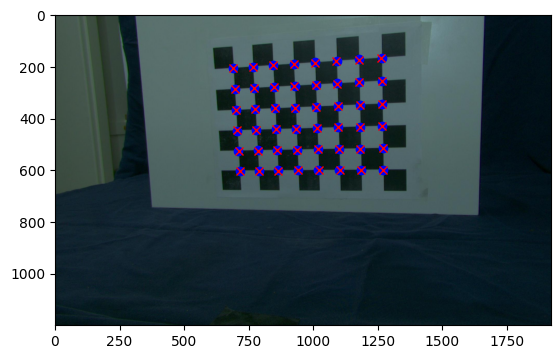

Camera : 
 f=1402.2941082854932 
 c=[[959.83703213 583.45486267]] 
 R=[[ 0.03884436  0.98981169  0.13698147]
 [ 0.97696218 -0.00883092 -0.2132297 ]
 [-0.20984758  0.14210849 -0.96735163]] 
 t = [[ 7.22817482 20.90563403 50.59019818]]


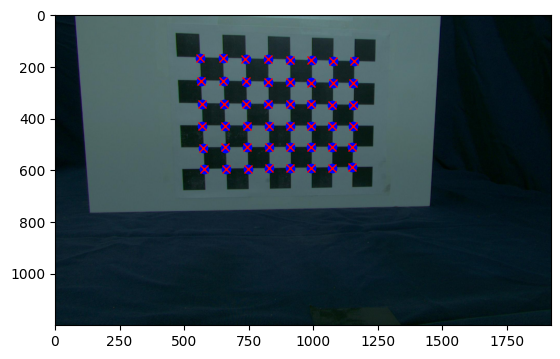

Camera : 
 f=1409.0963508438579 
 c=[[963.54993838 599.72053131]] 
 R=[[-0.00226799  0.99087013  0.13480073]
 [ 0.99277887 -0.01393666  0.11914652]
 [ 0.1199374   0.13409754 -0.98368332]] 
 t = [[ 8.29185692  7.74888118 51.40249373]]


In [8]:
# Extrinsic camera calibration
cam1Image = CAM1_CALIB_EX
cam2Image = CAM2_CALIB_EX

cam1, cam1_pts2, pts3 = calibration.extrinsic_Calibration(chessboardDimensions, cam1Image, cam1K)
cam2, cam2_pts2, pts3 = calibration.extrinsic_Calibration(chessboardDimensions, cam2Image, cam2K)

# Display
# Left
plt.figure()
pts2_1 = cam1.project(pts3)
imgL = plt.imread(cam1Image)
plt.imshow(imgL)
plt.plot(pts2_1[0,:],pts2_1[1,:],'bo')
plt.plot(cam1_pts2[0,:],cam1_pts2[1,:],'rx')
plt.show()
print(cam1)

# Right
plt.figure()
pts2_2 = cam2.project(pts3)
imgR = plt.imread(cam2Image)
plt.imshow(imgR)
plt.plot(pts2_2[0,:],pts2_2[1,:],'bo')
plt.plot(cam2_pts2[0,:],cam2_pts2[1,:],'rx')
plt.show()
print(cam2)


In [5]:
# Thresholds for decoding and reconstruction
gray_threshold = 0.01
color_threshold = 0.006

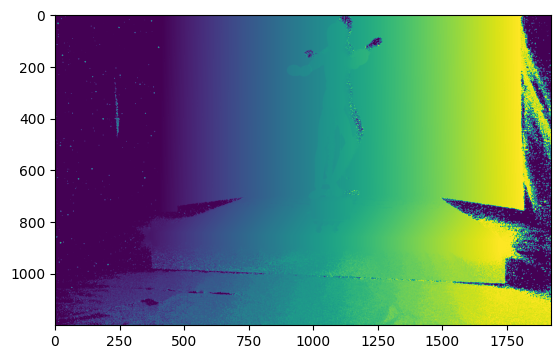

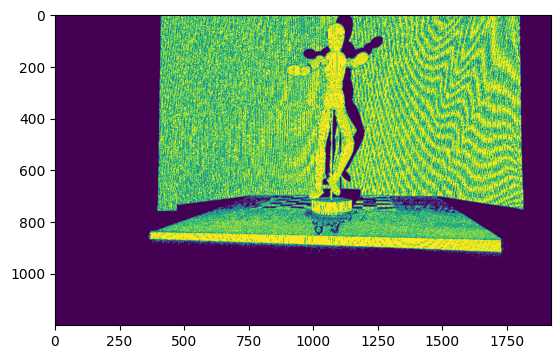

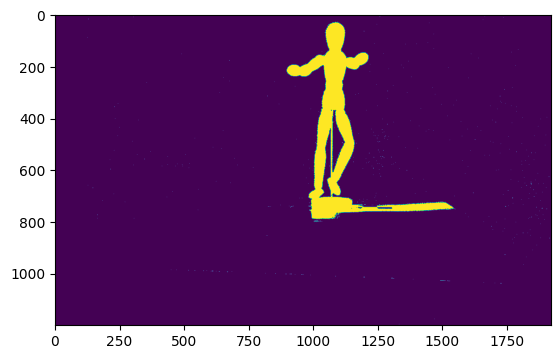

In [10]:
#( .png images)

# Code and gray mask
imagePrefix = MASK_PREFIX
code, mask = decode.decode_gray(imagePrefix, 0, gray_threshold)
plt.figure() 
plt.imshow(code)
plt.figure() 
plt.imshow(mask)

# Color mask 
colorImagePrefix = COLOR_PREFIX
color_mask = decode.decode_color(colorImagePrefix, color_threshold)
plt.figure() 
plt.imshow(color_mask)


In [11]:
# Reconstruction and clean up
gray_threshold = 0.01
color_threshold = 0.006

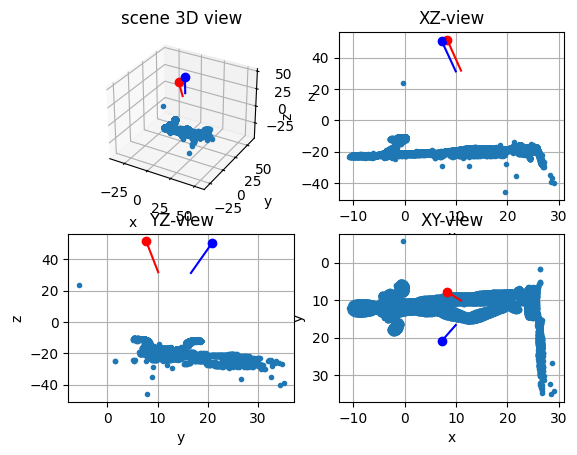

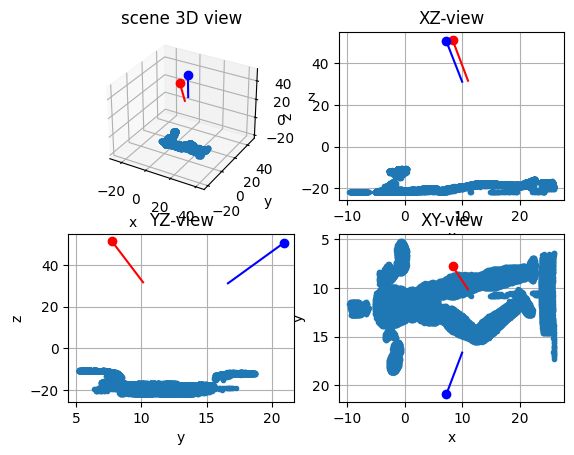

In [42]:
# GRAB 0
pts2L,pts2R,pts3 = decode.reconstruct(GRAB0[0], GRAB0[1], gray_threshold, GRAB0[2], GRAB0[3], color_threshold, cam1, cam2)
visutils.vis_scene(cam1,cam2,pts3,looklength=20)
# Pruning step
boxLimits = [-12,26,5,19,-22,5] # xLo, xHi, yLo, yHi, zLo, zHi
trithresh = 1
pts2L,pts2R,pts3 = meshing.bounding_box_pruning(pts2L,pts2R,pts3,boxLimits)
pts2L,pts2R,pts3 = meshing.triangle_pruning(pts2L,pts2R,pts3, trithresh)
visutils.vis_scene(cam1,cam2,pts3,looklength=20)

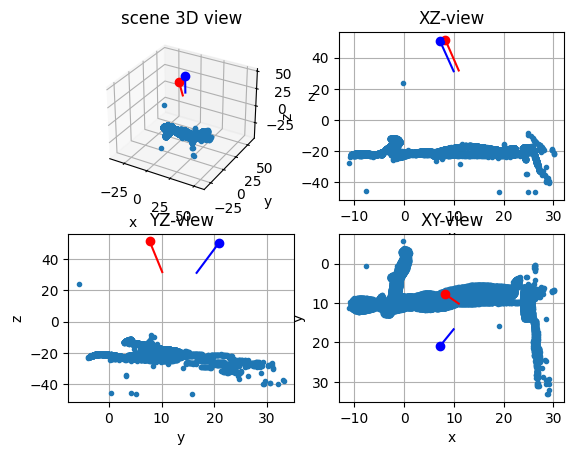

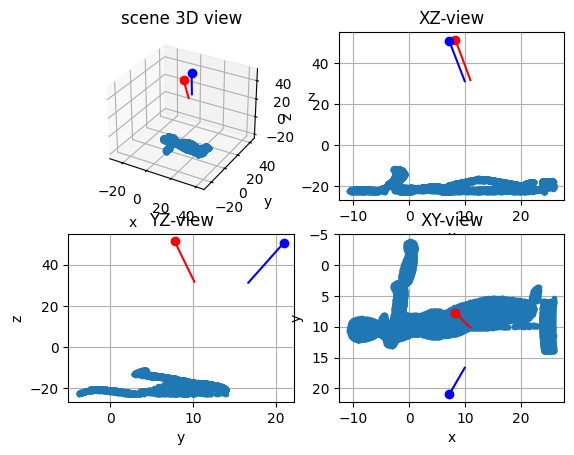

In [52]:
# GRAB 1
pts2L,pts2R,pts3 = decode.reconstruct(GRAB1[0], GRAB1[1], gray_threshold, GRAB1[2], GRAB1[3], color_threshold, cam1, cam2)
visutils.vis_scene(cam1,cam2,pts3,looklength=20)
boxLimits = [-12,26,-5,14,-23,10] # xLo, xHi, yLo, yHi, zLo, zHi
trithresh = 1
pts2L,pts2R,pts3 = meshing.bounding_box_pruning(pts2L,pts2R,pts3,boxLimits)
pts2L,pts2R,pts3 = meshing.triangle_pruning(pts2L,pts2R,pts3, trithresh)
visutils.vis_scene(cam1,cam2,pts3,looklength=20)

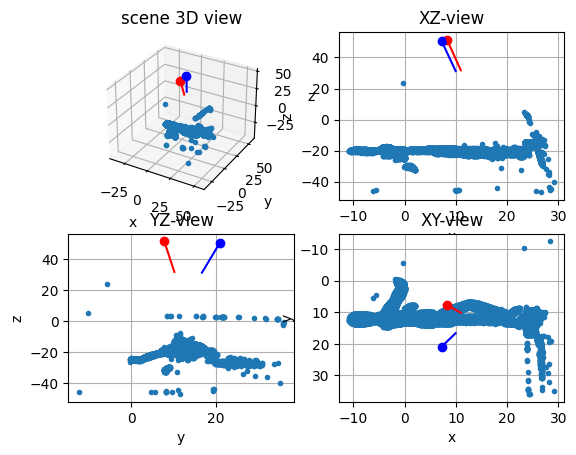

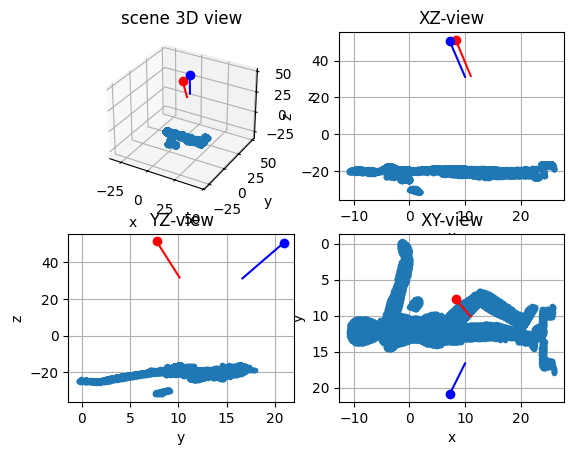

In [50]:
# GRAB 2
pts2L,pts2R,pts3 = decode.reconstruct(GRAB2[0], GRAB2[1], gray_threshold, GRAB2[2], GRAB2[3], color_threshold, cam1, cam2)
visutils.vis_scene(cam1,cam2,pts3,looklength=20)
boxLimits = [-12,26,-1,18,-32,-16] # xLo, xHi, yLo, yHi, zLo, zHi
trithresh = 1
pts2L,pts2R,pts3 = meshing.bounding_box_pruning(pts2L,pts2R,pts3,boxLimits)
pts2L,pts2R,pts3 = meshing.triangle_pruning(pts2L,pts2R,pts3, trithresh)
visutils.vis_scene(cam1,cam2,pts3,looklength=20)


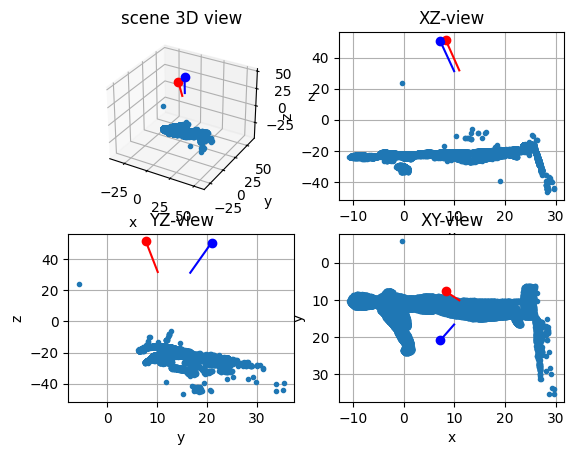

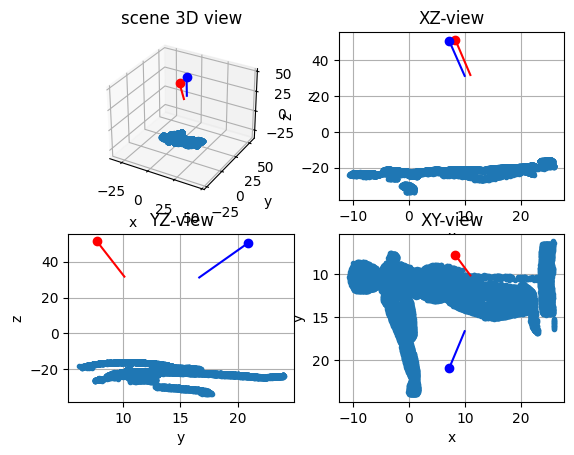

In [59]:
# GRAB 3
pts2L,pts2R,pts3 = decode.reconstruct(GRAB3[0], GRAB3[1], gray_threshold, GRAB3[2], GRAB3[3], color_threshold, cam1, cam2)
visutils.vis_scene(cam1,cam2,pts3,looklength=20)
boxLimits = [-12,26,6,24,-35,-5] # xLo, xHi, yLo, yHi, zLo, zHi
trithresh = 1
pts2L,pts2R,pts3 = meshing.bounding_box_pruning(pts2L,pts2R,pts3,boxLimits)
pts2L,pts2R,pts3 = meshing.triangle_pruning(pts2L,pts2R,pts3, trithresh)
visutils.vis_scene(cam1,cam2,pts3,looklength=20)


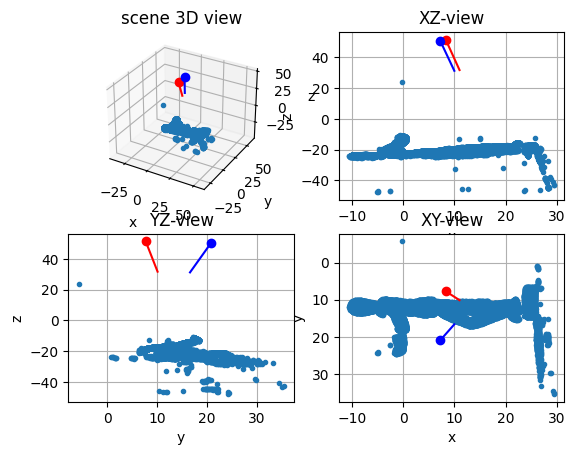

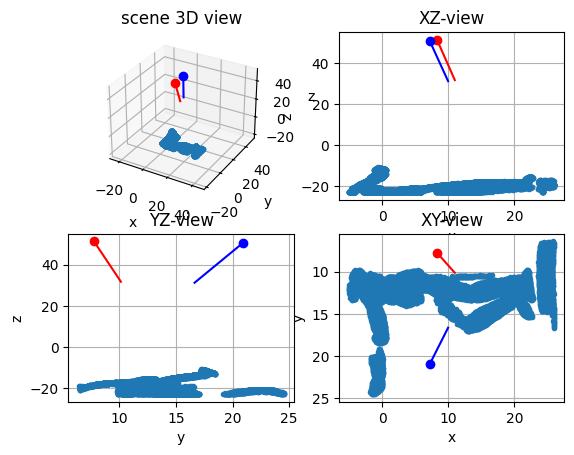

In [62]:
# GRAB 4
pts2L,pts2R,pts3 = decode.reconstruct(GRAB4[0], GRAB4[1], gray_threshold, GRAB4[2], GRAB4[3], color_threshold, cam1, cam2)
visutils.vis_scene(cam1,cam2,pts3,looklength=20)
boxLimits = [-12,26,5,25,-23,-5] # xLo, xHi, yLo, yHi, zLo, zHi
trithresh = 1
pts2L,pts2R,pts3 = meshing.bounding_box_pruning(pts2L,pts2R,pts3,boxLimits)
pts2L,pts2R,pts3 = meshing.triangle_pruning(pts2L,pts2R,pts3, trithresh)
visutils.vis_scene(cam1,cam2,pts3,looklength=20)


In [ ]:
'''
Enhance with Color Information:
Modify reconstruct to return RGB values for the 3D points.

Generate mesh
Helpful tools:
meshLab
poisson surface reconstruction

Remember to incoorporate color
must maintain color data

Visualize:
Blender
'''